* compare SGD, MultinomialNB on nlp.

In [2]:
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

In [5]:
def get_data(target_category=0, size=100):
    
    # get positive
    categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
    positive_train = datasets.fetch_20newsgroups(subset="train", categories=[categories[target_category]])
    positive_test = datasets.fetch_20newsgroups(subset="test", categories=[categories[target_category]])
    
    # get negative
    del categories[target_category]
    negative_train = datasets.fetch_20newsgroups(subset="train", categories=categories)
    negative_test = datasets.fetch_20newsgroups(subset="test", categories=categories)
    size_sep = int(size/2)
    
    # train
    train_x = np.hstack((positive_train.data[:size_sep], negative_train.data[:size_sep])).reshape(size,1)
    train_y = np.hstack((np.ones(size_sep, dtype="int32"), np.zeros(size_sep, dtype="int32"))).reshape(size,1)
    train = np.hstack((train_x, train_y))
    np.random.shuffle(train)
    
    # test
    test_x = np.hstack((positive_test.data[:size_sep], negative_test.data[:size_sep])).reshape(size,1)
    test_y = np.hstack((np.ones(size_sep, dtype="int32"), np.zeros(size_sep, dtype="int32"))).reshape(size,1)
    test = np.hstack((test_x, test_y))
    np.random.shuffle(test)
    train_x = np.array(train[:,0], dtype="object")
    train_y = np.array(train[:,1], dtype="int32")
    test_x = np.array(test[:,0], dtype="object")
    test_y = np.array(test[:,1], dtype="int32")
    
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = get_data()

len(train_x), len(train_y), len(test_x), len(test_y)

(100, 100, 100, 100)

In [3]:
train = datasets.fetch_20newsgroups(subset='train')
vectorizer = CountVectorizer(binary=True) # BoW, binary
vectorizer.fit_transform(train.data)

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

1	1.754967451095581[sec]
2	1.7151567935943604[sec]
3	1.7260870933532715[sec]
4	1.7364914417266846[sec]
5	1.7241735458374023[sec]
6	1.7324409484863281[sec]
7	1.7588567733764648[sec]
8	1.7106044292449951[sec]
9	1.7542228698730469[sec]
10	1.765277624130249[sec]
11	1.7411298751831055[sec]
12	1.7497544288635254[sec]
13	1.7617201805114746[sec]
14	1.74261474609375[sec]
15	1.74876070022583[sec]
16	1.7177133560180664[sec]
17	1.7299299240112305[sec]
18	1.7514097690582275[sec]
19	1.7030439376831055[sec]
20	1.7309844493865967[sec]
21	1.7459676265716553[sec]
22	1.7410798072814941[sec]
23	1.7144179344177246[sec]
24	1.7317829132080078[sec]
25	1.7056634426116943[sec]
26	1.710930347442627[sec]
27	1.708709955215454[sec]
28	1.7461833953857422[sec]
29	1.720818281173706[sec]
30	1.744218111038208[sec]


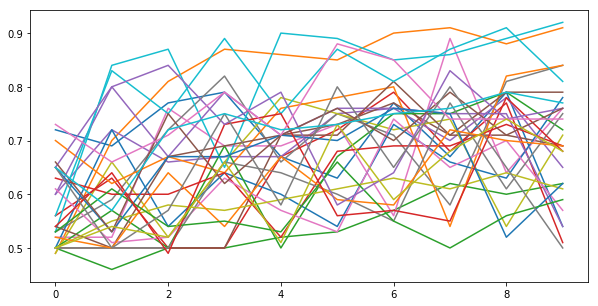

In [6]:
from sklearn.linear_model import SGDClassifier

SIZE = 100
FREQ = 10

# simulate
scores = []
for i in range(30):
    start = time.time()
    score = []
    train_x, train_y, test_x, test_y = get_data(target_category=np.random.randint(0,20), size=SIZE)
    train_x, test_x = vectorizer.transform(train_x), vectorizer.transform(test_x)
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, n_iter=None)
    for j in range(0, SIZE, FREQ):
        x = train_x[j:j+FREQ]
        y = train_y[j:j+FREQ]
        clf.partial_fit(x,y,classes=[0,1])
        score.append(clf.score(test_x, test_y))
    scores.append(score)
    elapsed_time = time.time()-start
    print("{}\t{}[sec]".format(i+1, elapsed_time))
    
# plot
x = np.arange(0,len(scores[0]))
plt.figure(figsize=(10,5))
for score in scores:
    plt.plot(x,score)
plt.show()

1	1.7796154022216797[sec]
2	1.7616336345672607[sec]
3	1.7385194301605225[sec]
4	1.8747639656066895[sec]
5	1.8213918209075928[sec]
6	1.8715629577636719[sec]
7	1.9007158279418945[sec]
8	1.9146690368652344[sec]
9	1.799255132675171[sec]
10	1.8047709465026855[sec]
11	1.7932779788970947[sec]
12	1.7683496475219727[sec]
13	1.8797543048858643[sec]
14	1.867699384689331[sec]
15	1.9180917739868164[sec]
16	1.885267734527588[sec]
17	1.8756606578826904[sec]
18	1.889331340789795[sec]
19	1.8333826065063477[sec]
20	1.846684217453003[sec]
21	1.8125479221343994[sec]
22	1.8806519508361816[sec]
23	1.7709417343139648[sec]
24	1.8135573863983154[sec]
25	1.7367212772369385[sec]
26	1.803450345993042[sec]
27	1.7820305824279785[sec]
28	1.7401089668273926[sec]
29	1.8306195735931396[sec]
30	1.8036353588104248[sec]


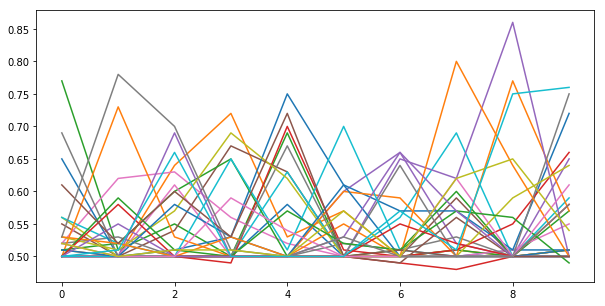

In [7]:
from sklearn.naive_bayes import MultinomialNB

SIZE = 100
FREQ = 10

# simulate
scores = []
for i in range(30):
    start = time.time()
    score = []
    train_x, train_y, test_x, test_y = get_data(target_category=np.random.randint(0,20), size=SIZE)
    train_x, test_x = vectorizer.transform(train_x), vectorizer.transform(test_x)
    clf = MultinomialNB(alpha=1.0)
    for j in range(0, SIZE, FREQ):
        x = train_x[j:j+FREQ]
        y = train_y[j:j+FREQ]
        clf.fit(x,y)
        score.append(clf.score(test_x, test_y))
    scores.append(score)
    elapsed_time = time.time()-start
    print("{}\t{}[sec]".format(i+1, elapsed_time))
    
# plot
x = np.arange(0,len(scores[0]))
plt.figure(figsize=(10,5))
for score in scores:
    plt.plot(x,score)
plt.show()